## Import Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Display graphs 
%matplotlib inline

In [3]:
# Set path
path = 'C:/Users/jeong/OneDrive/Desktop/CF Files/Achievement 6'

In [4]:
# Import data
df_food_surplus = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'food_surplus_cleaned.csv'))

In [5]:
# Check df
df_food_surplus.head(50)

,Unnamed: 0,year,state,sector,sub_sector,sub_sector_category,food_type,tons_surplus,tons_supply,us_dollars_surplus,...,tons_incinerated,tons_land_application,tons_landfilled,tons_sewer,tons_refuse_discards,upstream_mtco2e_footprint,downstream_mtco2e_footprint,total_mtco2e_footprint,gallons_water_footprint,meals_wasted
0,0,2021,Alabama,Farm,Not Applicable,Not Applicable,Dry Goods,8314.881697,320214.881700,3.883810e+06,...,0.000000,0.0,0.000000,0.0,0.000000,34693.574640,2.560352,34696.134990,4.676082e+09,1.385814e+07
1,1,2021,Alabama,Farm,Not Applicable,Not Applicable,Produce,56169.900990,216424.760100,1.586598e+07,...,13.232212,0.0,354.329224,0.0,688.009528,11481.349950,2256.026644,13737.376590,1.828809e+09,9.289640e+07
2,2,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Breads & Bakery,5.014448,188.451867,2.527011e+04,...,0.178206,0.0,4.771954,0.0,0.000000,11.966534,7.289450,19.255983,9.666914e+04,8.269175e+03
3,3,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Dairy & Eggs,2.385432,89.648781,1.279831e+04,...,0.084775,0.0,2.270075,0.0,0.000000,11.419306,1.124870,12.544176,6.806127e+05,3.933744e+03
4,4,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Dry Goods,4.263947,160.246725,1.471922e+04,...,0.151534,0.0,4.057747,0.0,0.000000,13.478114,4.155081,17.633195,5.264528e+05,7.031547e+03
5,5,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Fresh Meat & Seafood,10.162339,381.918777,5.445883e+04,...,0.361154,0.0,9.670899,0.0,0.000000,148.855102,7.330722,156.185824,1.192338e+07,1.675841e+04
6,6,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Frozen,0.022969,0.863228,6.351431e+01,...,0.000816,0.0,0.021859,0.0,0.000000,0.124806,0.019014,0.143820,7.787407e+03,3.787802e+01
7,7,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Prepared Foods,162.465022,0.000000,1.760354e+06,...,5.839819,0.0,156.377367,0.0,0.000000,749.428763,121.193625,870.622388,7.711321e+07,2.704349e+05
8,8,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Produce,8.090763,304.065270,2.886353e+04,...,0.287533,0.0,7.699502,0.0,0.000000,14.093726,2.343767,16.437493,3.644906e+05,1.334223e+04
9,9,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Ready-To-Drink Beverages,3.480038,130.786029,3.190300e+03,...,0.123675,0.0,3.311747,0.0,0.000000,14.687050,3.111395,17.798445,9.352360e+04,5.738826e+03


In [6]:
# Drop Unnamed: 0 column
df_food_surplus = df_food_surplus.drop(columns = ['Unnamed: 0'])

In [7]:
# Check shape
df_food_surplus.shape

(173364, 30)

## 02. Data Cleaning

### Missing Values

In [8]:
# Check for missing values
df_food_surplus.isnull().sum()

# No missing values to handle

year                                  0
state                                 0
sector                                0
sub_sector                            0
sub_sector_category                   0
food_type                             0
tons_surplus                          0
tons_supply                           0
us_dollars_surplus                    0
tons_waste                            0
tons_uneaten                          0
tons_eaten                            0
tons_inedible_parts                   0
tons_not_fit_for_human_consumption    0
tons_donated                          0
tons_biomaterial_processing           0
tons_animal_feed                      0
tons_anaerobically_digested           0
tons_composted                        0
tons_not_harvested                    0
tons_incinerated                      0
tons_land_application                 0
tons_landfilled                       0
tons_sewer                            0
tons_refuse_discards                  0


### Duplicates check

In [9]:
# Check for duplicates
dups = df_food_surplus.duplicated()

In [10]:
dups.shape

(173364,)

### Extreme values checks

#### Extreme value check 'us_dollars_surplus'

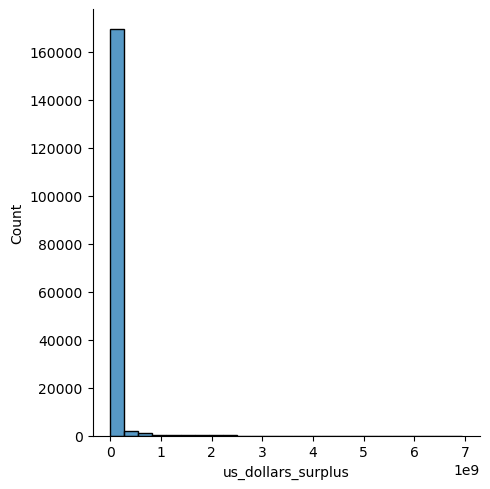

In [11]:
sns.displot(df_food_surplus['us_dollars_surplus'], bins=25)

In [12]:
# Check summary stats
df_food_surplus['us_dollars_surplus'].describe()

count    1.733640e+05
mean     2.698283e+07
std      1.603436e+08
min      0.000000e+00
25%      1.899406e+04
50%      1.407464e+05
75%      1.224078e+06
max      6.946889e+09
Name: us_dollars_surplus, dtype: float64

#### Extreme values check 'tons_waste'

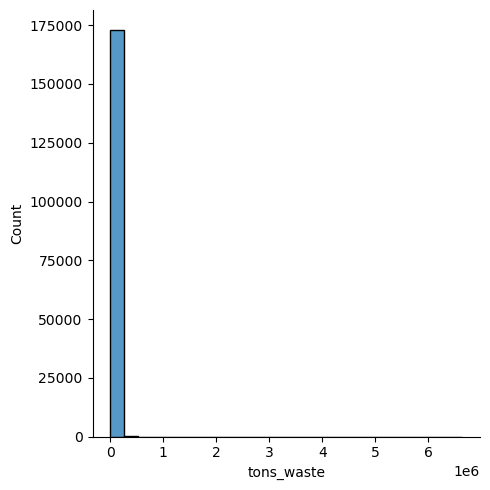

In [13]:
sns.displot(df_food_surplus['tons_waste'], bins=25)

In [14]:
# Check summary stats
df_food_surplus['tons_waste'].describe()

count    1.733640e+05
mean     5.202472e+03
std      6.443390e+04
min      0.000000e+00
25%      7.566830e+00
50%      4.577711e+01
75%      2.766873e+02
max      6.639534e+06
Name: tons_waste, dtype: float64

#### Extreme values check 'tons_not_fit_for_human_consumption

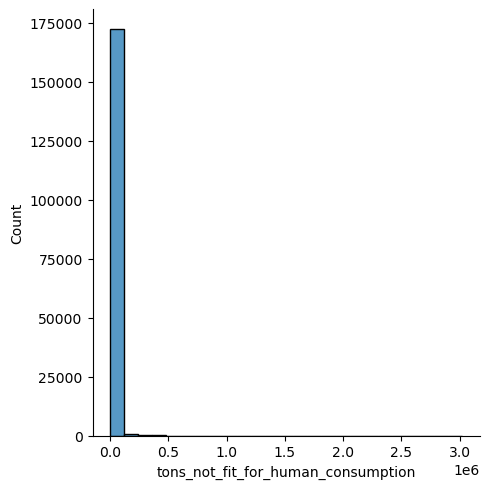

In [15]:
sns.displot(df_food_surplus['tons_not_fit_for_human_consumption'], bins=25)

In [16]:
# Check summary stats
df_food_surplus['tons_not_fit_for_human_consumption'].describe()

count    1.733640e+05
mean     3.213538e+03
std      3.665132e+04
min      0.000000e+00
25%      0.000000e+00
50%      7.523570e+00
75%      5.505273e+01
max      3.022696e+06
Name: tons_not_fit_for_human_consumption, dtype: float64

#### Extreme values check  'tons_landfilled'

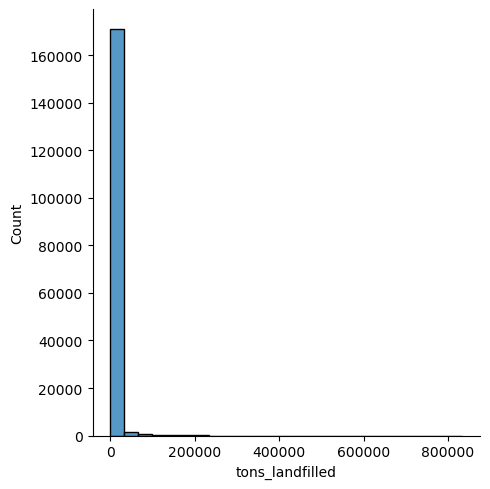

In [17]:
sns.displot(df_food_surplus['tons_landfilled'], bins=25)

In [18]:
# Check summary stats
df_food_surplus['tons_landfilled'].describe()

count    173364.000000
mean       2065.566009
std       13972.775719
min           0.000000
25%           5.062730
50%          33.738936
75%         205.902765
max      833885.318700
Name: tons_landfilled, dtype: float64

#### Extreme values check 'total_mtco2e_footprint'

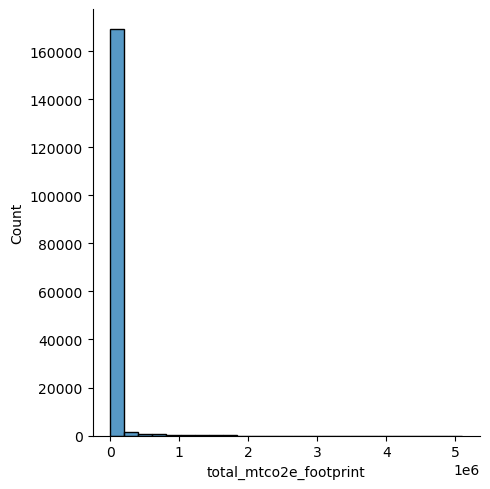

In [19]:
sns.displot(df_food_surplus['total_mtco2e_footprint'], bins=25)

In [20]:
# Check summary stats
df_food_surplus['total_mtco2e_footprint'].describe()

count    1.733640e+05
mean     2.398738e+04
std      1.556582e+05
min      0.000000e+00
25%      3.435223e+01
50%      2.213685e+02
75%      1.702293e+03
max      5.100032e+06
Name: total_mtco2e_footprint, dtype: float64

#### Extreme values check 'gallons_water_footprint'

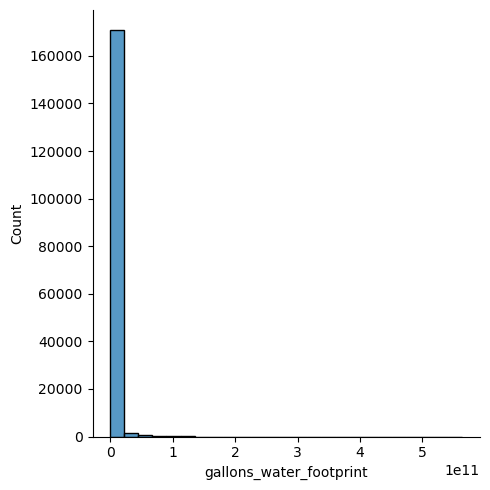

In [21]:
sns.displot(df_food_surplus['gallons_water_footprint'], bins=25)

In [22]:
# Check summary stats
df_food_surplus['gallons_water_footprint'].describe()

count    1.733640e+05
mean     1.416287e+09
std      9.836177e+09
min      0.000000e+00
25%      5.465339e+05
50%      4.997610e+06
75%      7.485216e+07
max      5.640000e+11
Name: gallons_water_footprint, dtype: float64

## 03. Data Prep for Regression Analysis

#### Scatterplot of Surplus in US Dollars vs Total Carbon Emissions

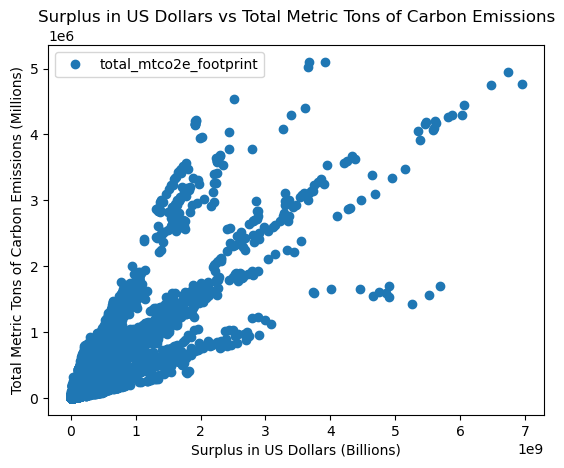

In [23]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_food_surplus.plot(x = 'us_dollars_surplus', y = 'total_mtco2e_footprint', style='o')
plt.title('Surplus in US Dollars vs Total Metric Tons of Carbon Emissions')
plt.xlabel('Surplus in US Dollars (Billions)')
plt.ylabel('Total Metric Tons of Carbon Emissions (Millions)')
plt.show()

#### Scatterplot of Food Waste in Landfills in Tons vs Total Metric Ton of Carbon Emissions

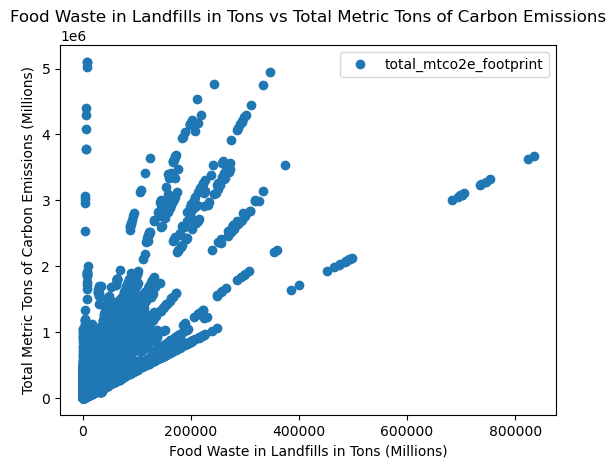

In [24]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_food_surplus.plot(x = 'tons_landfilled', y = 'total_mtco2e_footprint', style='o')
plt.title('Food Waste in Landfills in Tons vs Total Metric Tons of Carbon Emissions')
plt.xlabel('Food Waste in Landfills in Tons (Millions)')
plt.ylabel('Total Metric Tons of Carbon Emissions (Millions)')
plt.show()

#### Scatterplot of Gallons of Water Used vs Total Metric Tons of Carbon Emissions

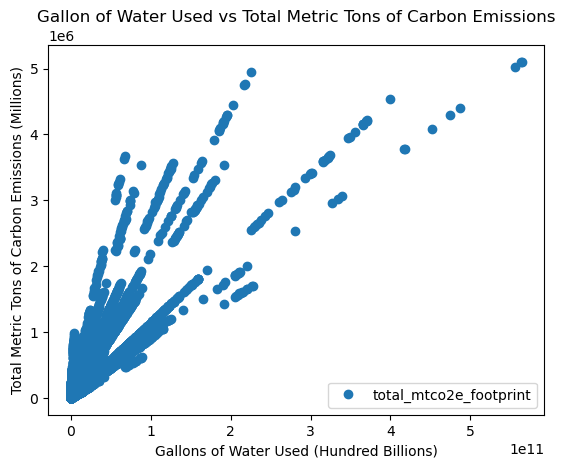

In [25]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_food_surplus.plot(x = 'gallons_water_footprint', y = 'total_mtco2e_footprint', style='o')
plt.title('Gallon of Water Used vs Total Metric Tons of Carbon Emissions')
plt.xlabel('Gallons of Water Used (Hundred Billions)')
plt.ylabel('Total Metric Tons of Carbon Emissions (Millions)')
plt.show()

#### Scatterplot of Food Waste in Tons vs Food That is Unfit for Human Consumption in Tons

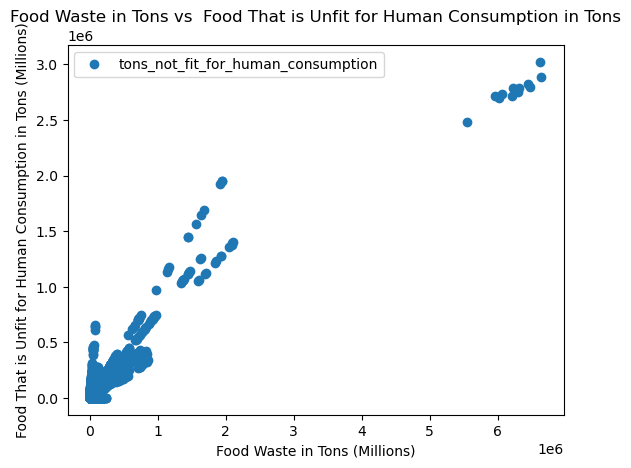

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_food_surplus.plot(x = 'tons_waste', y = 'tons_not_fit_for_human_consumption', style='o')
plt.title('Food Waste in Tons vs  Food That is Unfit for Human Consumption in Tons')
plt.xlabel('Food Waste in Tons (Millions)')
plt.ylabel('Food That is Unfit for Human Consumption in Tons (Millions)')
plt.show()

## 04. Hypothesis

### If a state has a greater amount of food surplus in terms of US dollars, then there will be higher co2 emissions from that state. 
<br>

In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df_food_surplus['us_dollars_surplus'].values.reshape(-1,1)
y = df_food_surplus['total_mtco2e_footprint'].values.reshape(-1,1)

In [28]:
X

array([[ 3883810.342  ],
       [15865980.66   ],
       [   25270.11303],
       ...,
       [ 3500579.238  ],
       [ 4223520.086  ],
       [  664768.3427 ]])

In [29]:
y

array([[3.46961350e+04],
       [1.37373766e+04],
       [1.92559833e+01],
       ...,
       [3.01054068e+03],
       [1.72411820e+03],
       [1.24217055e+03]])

In [30]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=0)

## 04. Regression Analysis

In [31]:
# Create a regression object
regression = LinearRegression()

In [32]:
# Fit the regression object into the training set
regression.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

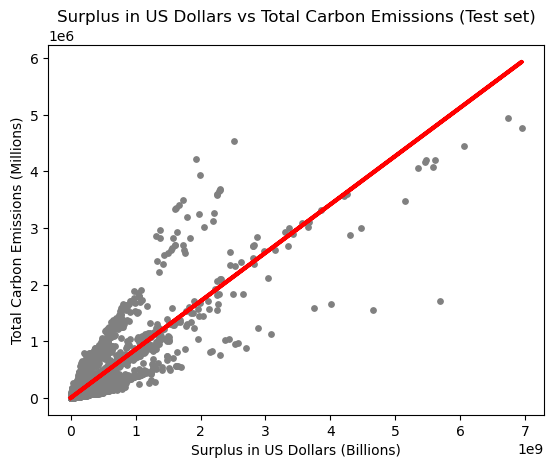

In [34]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color= 'gray', s=15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth=3)
plot_test.title('Surplus in US Dollars vs Total Carbon Emissions (Test set)')
plot_test.xlabel('Surplus in US Dollars (Billions)')
plot_test.ylabel('Total Carbon Emissions (Millions)')
plot_test.show()

The line does not seem to fit that well, in that, a significant portion of the data points diverge from the line. <br>
There is an observable distance between the data points and the line starting from the lower end of the line and increases.

In [35]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score

In [36]:
# Print the model summary statistics. Evaluate the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00085366]]
Mean squared error:  5667467537.903017
R2 score:  0.7805935160810467


In [37]:
y_predicted

array([[ 3334.28665574],
       [ 1019.73713451],
       [ 1030.58872899],
       ...,
       [68046.13475704],
       [ 1118.45804247],
       [ 1056.63001296]])

In [38]:
# Create dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4610.558783,3334.286656
1,3.024201,1019.737135
2,35.938200,1030.588729
3,42.045756,1038.148105
4,29015.169000,55315.494230
5,27262.886740,47814.778718
6,14681.430440,20414.791730
7,107.578915,1157.200622
8,2851.021991,1724.222422
9,29.537883,1033.941443


The model completely failed to predict the y values accurately. As observed from the line plot of the regression line, we can that there is a significant distance between the lines and the data points. This is confirmed by the MSE. The model most likely failed due to the fact that there is high variance in the data. There is high variance probably due to the fact that the data set is a collection of data from various different states, sectors, sub-sectors, sub-sector category and food-types.

#### Compare how the regression fits the training set

In [39]:
# Predict.
y_predicted_train = regression.predict(X_train)

In [40]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00085366]]
Mean squared error:  5801833146.891178
R2 score:  0.7535623415490291


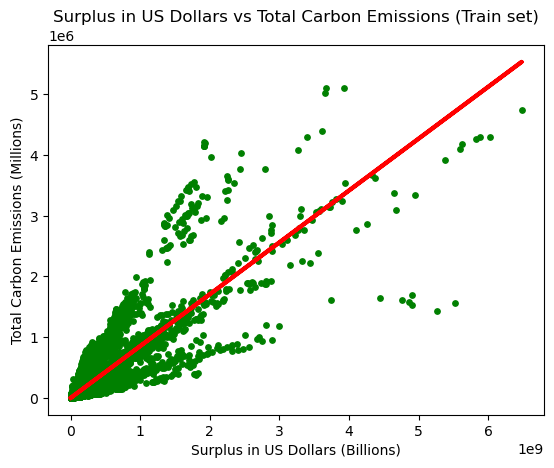

In [42]:
# Visualizing the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color= 'green', s=15)
plot_test.plot(X_train, y_predicted_train, color = 'red', linewidth=3)
plot_test.title('Surplus in US Dollars vs Total Carbon Emissions (Train set)')
plot_test.xlabel('Surplus in US Dollars (Billions)')
plot_test.ylabel('Total Carbon Emissions (Millions)')
plot_test.show()

## 05. Removing outliers to improve performance

In [43]:
# Clean the extreme values from the 'us_dollars_surplus' variable observed during the consistency checks
df_food_surplus['us_dollars_surplus'].describe()

count    1.733640e+05
mean     2.698283e+07
std      1.603436e+08
min      0.000000e+00
25%      1.899406e+04
50%      1.407464e+05
75%      1.224078e+06
max      6.946889e+09
Name: us_dollars_surplus, dtype: float64

In [44]:
# IQR = 1244078 - 18994.06
# outlier > 1.5 x 1225083.94 + 1244078
# outlier > 3081703.91
df_test = df_food_surplus[df_food_surplus['us_dollars_surplus'] <= 3081703.91]

In [45]:
df_test.shape

(140032, 30)

In [46]:
# Clean the extreme values from the 'total_mtco2e_footprint' variable 
df_test['total_mtco2e_footprint'].describe()

count    140032.000000
mean        483.189701
std        1011.250431
min           0.000000
25%          20.508208
50%         114.562598
75%         462.576072
max       30760.741260
Name: total_mtco2e_footprint, dtype: float64

In [47]:
# IQR = 462.58 - 20.51
# outlier > 1.5 x 442.07 + 462.58
# outlier > 1125.685
df_test = df_food_surplus[df_food_surplus['total_mtco2e_footprint'] <= 1125.685]

In [48]:
df_test.head(50)

,year,state,sector,sub_sector,sub_sector_category,food_type,tons_surplus,tons_supply,us_dollars_surplus,tons_waste,...,tons_incinerated,tons_land_application,tons_landfilled,tons_sewer,tons_refuse_discards,upstream_mtco2e_footprint,downstream_mtco2e_footprint,total_mtco2e_footprint,gallons_water_footprint,meals_wasted
2,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Breads & Bakery,5.014448,188.451867,2.527011e+04,4.960965,...,0.178206,0.0,4.771954,0.0,0.0,11.966534,7.289450,19.255983,9.666914e+04,8269.174779
3,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Dairy & Eggs,2.385432,89.648781,1.279831e+04,2.359990,...,0.084775,0.0,2.270075,0.0,0.0,11.419306,1.124870,12.544176,6.806127e+05,3933.744199
4,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Dry Goods,4.263947,160.246725,1.471922e+04,4.218469,...,0.151534,0.0,4.057747,0.0,0.0,13.478114,4.155081,17.633195,5.264528e+05,7031.547084
5,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Fresh Meat & Seafood,10.162339,381.918777,5.445883e+04,10.053949,...,0.361154,0.0,9.670899,0.0,0.0,148.855102,7.330722,156.185824,1.192338e+07,16758.407210
6,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Frozen,0.022969,0.863228,6.351431e+01,0.022724,...,0.000816,0.0,0.021859,0.0,0.0,0.124806,0.019014,0.143820,7.787407e+03,37.878021
7,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Prepared Foods,162.465022,0.000000,1.760354e+06,162.258839,...,5.839819,0.0,156.377367,0.0,0.0,749.428763,121.193625,870.622388,7.711321e+07,270434.869300
8,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Produce,8.090763,304.065270,2.886353e+04,8.004469,...,0.287533,0.0,7.699502,0.0,0.0,14.093726,2.343767,16.437493,3.644906e+05,13342.233760
9,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Ready-To-Drink Beverages,3.480038,130.786029,3.190300e+03,3.442921,...,0.123675,0.0,3.311747,0.0,0.0,14.687050,3.111395,17.798445,9.352360e+04,5738.826311
10,2021,Alabama,Foodservice,Business & Industry,Business & Industry,Breads & Bakery,14.334086,827.194637,5.500100e+04,14.181202,...,0.509411,0.0,13.640904,0.0,0.0,34.207022,20.837309,55.044331,2.763343e+05,23637.909680
11,2021,Alabama,Foodservice,Business & Industry,Business & Industry,Dairy & Eggs,21.416800,1235.925491,7.278284e+04,21.188373,...,0.761120,0.0,20.381106,0.0,0.0,102.524399,10.099271,112.623670,6.110653e+06,35317.800470


In [49]:
df_test.shape

(123337, 30)

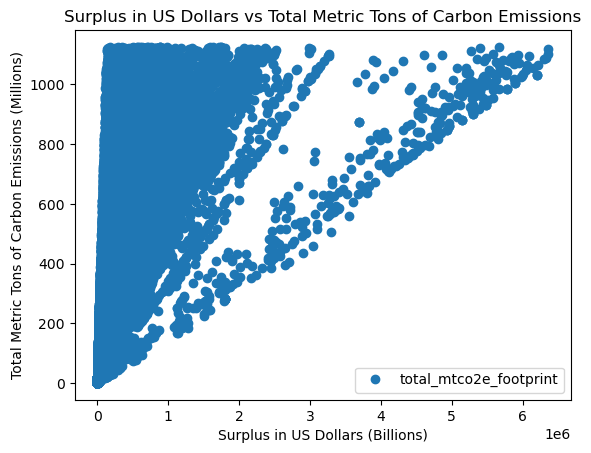

In [50]:
# See how the scatterplot looks like without outliers
df_test.plot(x = 'us_dollars_surplus', y = 'total_mtco2e_footprint', style='o')
plt.title('Surplus in US Dollars vs Total Metric Tons of Carbon Emissions')
plt.xlabel('Surplus in US Dollars (Billions)')
plt.ylabel('Total Metric Tons of Carbon Emissions (Millions)')
plt.show()

In [51]:
# Reshape again.
X_2 = df_test['us_dollars_surplus'].values.reshape(-1,1)
y_2 = df_test['total_mtco2e_footprint'].values.reshape(-1,1)

In [52]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [53]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [54]:
# Predict.
y_predicted_2 = regression.predict(X_test_2)

In [55]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [56]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00050896]]
Mean squared error:  36559.03821444806
R2 score:  0.4575286907093855


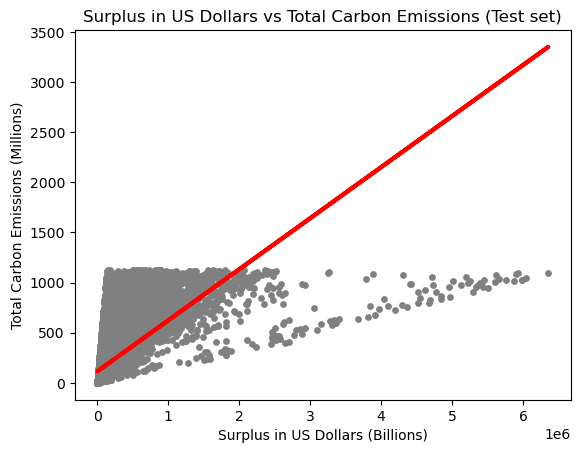

In [57]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color= 'gray', s=15)
plot_test.plot(X_test_2, y_predicted_2, color = 'red', linewidth=3)
plot_test.title('Surplus in US Dollars vs Total Carbon Emissions (Test set)')
plot_test.xlabel('Surplus in US Dollars (Billions)')
plot_test.ylabel('Total Carbon Emissions (Millions)')
plot_test.show()

In [58]:
# Create dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4610.558783,3334.286656
1,3.024201,1019.737135
2,35.938200,1030.588729
3,42.045756,1038.148105
4,29015.169000,55315.494230
5,27262.886740,47814.778718
6,14681.430440,20414.791730
7,107.578915,1157.200622
8,2851.021991,1724.222422
9,29.537883,1033.941443


Removing the outliers, removed 30% of the data set. While removing the outliers did signficantly improve the MSE, the MSE is still too high to suggest that the model performed well. Additionally, removing the outliers also changed the correlation of the two variables significantly from a strong correlation to a weak/moderate correlation.